In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# The Multivariate Normal - Diagonal Covariance Case

## Objectives

+ To introduce the multivariate normal with diagonal covariance.

## The multivariate mormal - Diagonal covariance case

Consider the $N$-dimensional multivariate normal:

$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \operatorname{diag}\left(\sigma_1^2,\dots,\sigma_N^2\right)\right),
$$

where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\sigma_i$ are positive numbers.
This is known as the multivariate normal with diagonal covariance.
All the components of the vector are independent.
Let's first visualize the joint PDF of this random vector in 2D.
We are going to plot its contours.

In [2]:
import scipy.stats as st
# The mean vector
mu = [1.0, 2.0]
# The variance of each component
sigma2 = [1.0, 1.0]
# The covariance matrix of the multivariate normal
Sigma = np.diag(sigma2)
# Create the random variable using scipy.stats
X = st.multivariate_normal(mean=mu, cov=Sigma)

Here is how you can sample from $X$.

In [3]:
X.rvs()

array([0.681, 1.191])

Here is how you can evaluate the PDF at a point.

In [4]:
pdf_val_X = X.pdf([0.5, -1.0])
print(f"PDF at (0.5, -1.0) = {pdf_val_X:.3e}")

PDF at (0.5, -1.0) = 1.560e-03


Now, let's do the contour of the PDF.
We will do it slowlly.
It is very important to learn how to do contours in Python.

It takes three steps.
First, we need a grid of x1 and x2 points.

In [5]:
# Points along x1 dimension
x1 = np.linspace(-3, 5, 64)
# Points along x2 dimension
x2 = np.linspace(-3, 5, 64)
# Create the grid
X1, X2 = np.meshgrid(x1, x2)
# These are 64 x 64 matrices
print(X1.shape)

(64, 64)


Here is how your grid looks like:

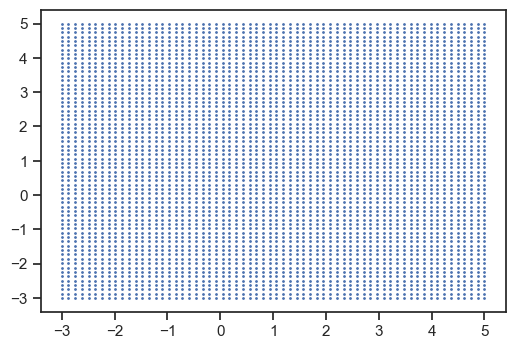

In [6]:
fig, ax = plt.subplots()
ax.plot(X1.flatten(), X2.flatten(), '.', markersize=2);

We are going to evaluate the PDF on all these points.
To this end, we create a (64^2) x 2 array of all the grid points by flattening X1 and X2:

In [7]:
X_flat = np.hstack(
    [
        X1.flatten()[:, None],
        X2.flatten()[:, None]
    ]
)
print(X_flat.shape)

(4096, 2)


Now we can evaluate the PDF at all these points:

In [8]:
z = X.pdf(X_flat)
print(z.shape)
print(z)

(4096,)
[1.990e-10 3.280e-10 5.321e-10 ... 1.586e-06 9.778e-07 5.931e-07]


We reshape z to 64 x 64:

In [9]:
Z = z.reshape((64, 64))
print(Z.shape)

(64, 64)


And now we can plot the contour:

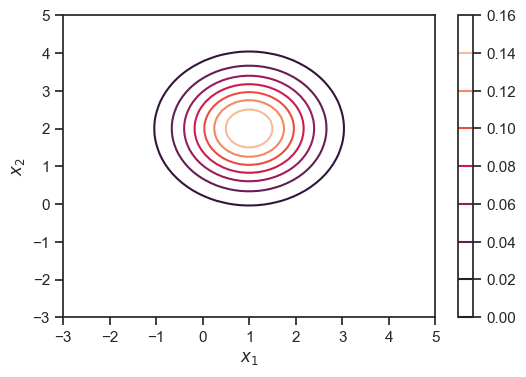

In [10]:
fig, ax = plt.subplots()
c = ax.contour(X1, X2, Z)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.colorbar(c);

Now, let's take samples of X and add them in this figure:

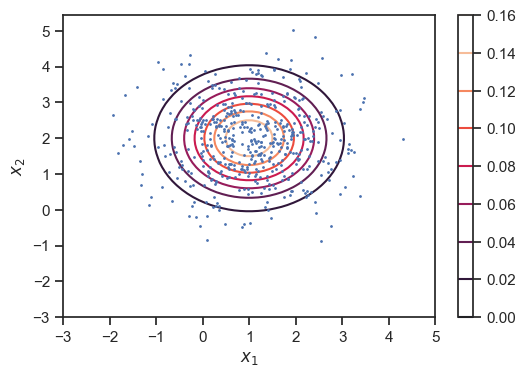

In [11]:
num_samples = 500
x_samples = X.rvs(size=num_samples)
ax.plot(x_samples[:, 0], x_samples[:, 1], '.', markersize=2)
fig

## Questions

+ Rerun the steps above after moving $\boldsymbol{\mu}$ to $(0, 1)$. Observe how the contours of the PDF move.
+ Rerun the steps above for $\sigma_1^2 = 0.1$ and $\sigma_2^2 = 1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\sigma_1^2 = 1$ and $\sigma_2^2 = 0.1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\sigma_1^2 = 1$ and $\sigma_2^2 = 0.01$. Observe how the contours of the PDF change.

## Sampling the multivariate normal with diagonal covariance using the standard normal

In the lecture we showed that if $\mathbf{Z}$ is an $N$-dimensional standard normal:

$$
\mathbf{Z} \sim N(0,\mathbf{I}),
$$

where $\mathbf{I}$ is the $N\times N$ unit matrix (all zeros except the diagonal which is all ones), then the random vector:

$$
\mathbf{X} = \boldsymbol{\mu} + \operatorname{diag}\left(\sigma_1, \dots,\sigma_N\right)\mathbf{Z},
$$

is a multivariate normal:

$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \operatorname{diag}\left(\sigma_1^2,\dots,\sigma_N^2\right)\right).
$$

Let's verify this by creating samples of $\mathbf{X}$ using samples of $\mathbf{Z}$ and then plotting these samples together with the contours of $N\left(\boldsymbol{\mu}, \operatorname{diag}\left(\sigma_1^2,\dots,\sigma_N^2\right)\right)$.

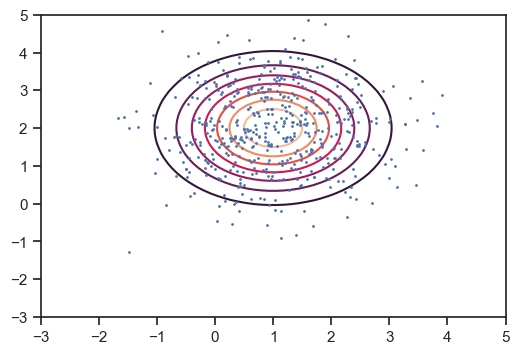

In [12]:
# The multivariate normal that you want to study:
# The mean vector
mu = [1.0, 2.0]
# The variance of each component
sigma2 = [1.0, 1.0]
# The covariance matrix of the multivariate normal
Sigma = np.diag(sigma2)
# Create the random variable using scipy.stats
X = st.multivariate_normal(mean=mu, cov=Sigma)

# The number of samples you want to take:
num_samples = 500
# Here is how you can sample from Z:
z_samples = np.random.randn(num_samples, 2)
# Transforms these to samples of X 
# (2-vector + (N x 2)-matrix * (2 x 2)-matrix = 2-vector + (N x 2)-matrix)
# = (N x 2)-matrix
# Please pay attention to the sqrt(Sigma)
# NOT just Sigma.
x_samples = mu + z_samples @ np.sqrt(Sigma)

# ******************************************************
# In case you missed it, "@" does matrix multiplication.
# ******************************************************

# Visualize everything
fig, ax = plt.subplots()
x1 = np.linspace(-3, 5, 64)
X1, X2 = np.meshgrid(x1, x1)
X_flat = np.hstack(
    [
        X1.flatten()[:, None],
        X2.flatten()[:, None]
    ]
)
pdf_X_flat = X.pdf(X_flat).reshape(X1.shape)
c = ax.contour(X1, X2, pdf_X_flat)
ax.plot(
    x_samples[:, 0],
    x_samples[:, 1],
    '.',
    markersize=2
);

## Questions

+ Rerun the steps above changing $\boldsymbol{\mu}, \sigma_1^2$ and $\sigma_2^2$ and observe that you are always getting the correct samples.